https://www.kaggle.com/code/unfinishedgod/automl-h2o-practice-with-safe-driver-prediction

# Porto Seguros Safe Driver Prediction with Automl.h2o - Python Version

**Changes:**

- Ported R code to Python

- Fixed obvious errors

**TODO:**

- Check for other errors and potential improvements

owen

2020-04-30 23:56:12

1. About Automl h2o

2. Reference

3. Porto Seguro's Safe Driver Prediction

4. Preparation

5. Data Cleaning

6. Visualization

7. Modeling

8. Review

## 1. About Automl h2o

Let's use AutoML h2o to analyze the Porto Seguro's Safe Driver Prediction kaggle. In this time I learned how to use the Automl h2o in R, and it was a topic that I chose while looking for how to use it. There is a lot to be lacking in using the automatic h2o, so I refer to a lot of sites, refer to a Kaggle notebook, and write it down.

## 2. Reference

The following is a reference link in studying h2o automl and the source of the notebook that analyzed Porto Seguros Safe Driver Prediction using h2o automl in the Kaggle.

- H2O AutoML
    + H2O tutorials: h2o tutorials 
        - http://docs.h2o.ai/h2o-tutorials/latest-stable/index.html

- H2O AutoML & Kaggle
    + Troy Walters: h2o AutoML 
        - https://www.kaggle.com/captcalculator/h2o-automl
    + Bhavesh Ghodasara: AutoML (h2o) Trial 
        - https://www.kaggle.com/bhavesh09/automl-h2o-trial

- Kaggle
    + Heads or Tails: Steering Wheel of Fortune - Porto Seguro EDA 
        - https://www.kaggle.com/headsortails/steering-wheel-of-fortune-porto-seguro-eda
    + Troy Walters: A Very Extensive Porto Exploratory Analysis 
        - https://www.kaggle.com/captcalculator/a-very-extensive-porto-exploratory-analysis

## 3. Porto Seguro's Safe Driver Prediction

Now lets get down to Porto Seguros Safe Driver Prediction. The goal is to predict whether drivers will claim insurance next year through data.

https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction

### 3.1 Evaluation

The competition will be evaluated as a Normalized Gini Coefficant. First, to understand Gini Coeffient, it its as follows.

In economics, the Gini coefficient, sometimes called the Gini index or Gini ratio, is a measure of statistical dispersion intended to represent the income or wealth distribution of a nations residents, and is the most commonly used measurement of inequality. It was developed by the Italian statistician and sociologist Corrado Gini and published in his 1912 paper Variability and Mutability (Italian: Variabilità e mutabilità).

Economics_Gini_coefficient.svg.png

https://en.wikipedia.org/wiki/Gini_coefficient

### 3.2 Data overview

- Each column can be classified as follows:
    + ind
    + reg
    + car
    + calc

- The format of the data can be determined by the column name as follows:
    + `_bin`: Binary Features
    + `_cat`: Categorical Features
    + Etc: Continuous or Ordinal Features

- Values of "-1" indicate that the feature was missing from the observation

## 4. Preparation

### 4.1 Packages & Data load

In [1]:
import h2o
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

In [2]:
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

### 4.2 H2O init

First, connect h2o and R through the `h2oinit()` function.

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_362"; OpenJDK Runtime Environment (build 1.8.0_362-b08); OpenJDK 64-Bit Server VM (build 25.362-b08, mixed mode)
  Starting server from /home/stever7/.local/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzlne0x6j
  JVM stdout: /tmp/tmpzlne0x6j/h2o_stever7_started_from_python.out
  JVM stderr: /tmp/tmpzlne0x6j/h2o_stever7_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,"1 year, 3 months and 7 days !!!"
H2O_cluster_name:,H2O_from_python_stever7_j9s56z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,26.63 Gb
H2O_cluster_total_cores:,64
H2O_cluster_allowed_cores:,64
H2O_cluster_status:,"locked, healthy"


### 4.3 Data structure

#### 4.3.1 Data structure

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

#### 4.3.2 Data summary

In [5]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


## 5 Data Cleaning

Lets do a data cleanging. As mentioned, the data in "-1" is missing value, so lets change it to NA. And the `_cat` column allows you to change it to a factor format.

In [6]:
train_set = train_set.replace(-1, np.nan)
test_set = test_set.replace(-1, np.nan)

In [7]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,594996.0,1.359799,0.663193,1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595129.0,0.416992,0.493062,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,589403.0,0.419038,1.350023,0.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


In [8]:
# cat_vars <- names(train_set)[grepl('_cat$', names(train_set))]

cat_vars = [col for col in train_set.columns if 'cat' in col]
cat_vars

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [9]:
# use "asfactor()" function after converting to H2O dataset

# train_set <- train_set %>%
#   mutate_at(.vars = cat_vars, .funs = as.factor)

# test_set <- test_set %>%
#   mutate_at(.vars = cat_vars, .funs = as.factor)

## 6 Visualization

### 6.1 Target visualiztion

Let's look at the target variable.

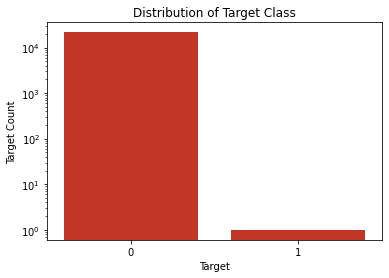

In [10]:
target_cat = pd.factorize(train_set["target"])

sns.barplot(data=target_cat, estimator=sum, ci=None, color="#D9230F", log=True)
plt.title("Distribution of Target Class")
plt.xlabel("Target")
plt.ylabel("Target Count")
plt.show()

*Obvious class imbalance concern that should be addressed, unless H2O automl automatically does that.*

### 6.2 Missing value

#### 6.2.1 Missing value visualiztion

Let's look at the missing value ratio. Only a few of the 59 columns have significant missing values.

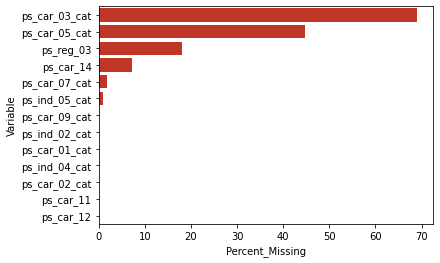

In [11]:
# http://theprofessionalspoint.blogspot.com/2019/03/visualize-missing-values-in-bar-plot.html
    
missing_values = 100 * train_set.isnull().sum() / len(train_set)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True, ascending=False)

missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Percent_Missing']
missing_values.index.names = ['Variable']
missing_values['Variable'] = missing_values.index

sns.barplot(y='Variable', x='Percent_Missing', data=missing_values, color="#D9230F")
plt.show()

#### 6.2.2 Missing value table

Let's take a closer look at the missing values of each column at the table. If you select only the top 10 and check it, it is as follows.

In [12]:
missing_values.drop(["Variable"], axis=1).reset_index()

,Variable,Percent_Missing
0,ps_car_03_cat,69.089837
1,ps_car_05_cat,44.782531
2,ps_reg_03,18.106490
3,ps_car_14,7.160474
4,ps_car_07_cat,1.930237
5,ps_ind_05_cat,0.975955
6,ps_car_09_cat,0.095596
7,ps_ind_02_cat,0.036290
8,ps_car_01_cat,0.017977
9,ps_ind_04_cat,0.013945


### 6.3 Correlation overview

#### 6.3.1 Correlation visualization

Let's draw a plot of the correlation between each data. There is a large number of data, so it doesn't mean much to display as a table, so let's just take a quick look at the graph.

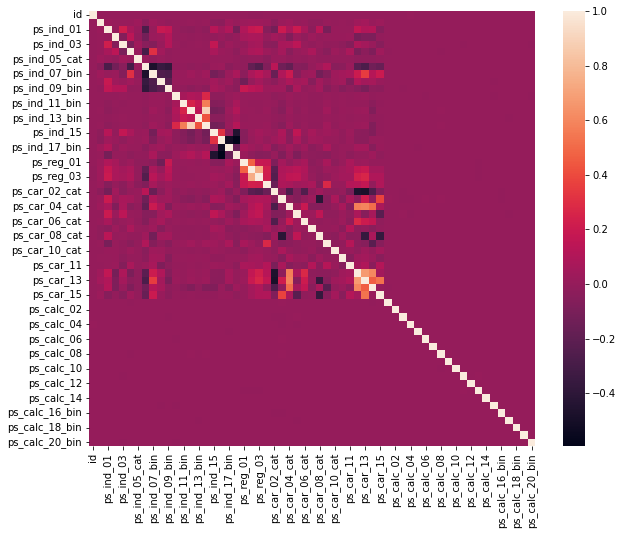

In [13]:
"""
train_set %>%
  select(-starts_with("ps_calc"), -ps_ind_10_bin, -ps_ind_11_bin, -ps_car_10_cat, -id) %>%
  mutate_at(vars(ends_with("cat")), funs(as.integer)) %>%
  mutate_at(vars(ends_with("bin")), funs(as.integer)) %>%
  mutate(target = as.integer(target)) %>%
  cor(use="complete.obs", method = "spearman") %>%
  corrplot(type="lower", tl.col = "black",  diag=FALSE)
"""

plt.figure(figsize=(10, 8))
sns.heatmap(train_set.corr())  # ignore the fact that "cat" variables are included as integers and "id" is suspect
plt.show()

## 7 Modeling

### 7.1 Train / Valid

Now that i have done the visualiztion, let's turn the model around. First, let's categorize the training data into Training / Validation data and conduct the test. Later, we will proceed with the evaluation with the test data.

In order to change the h2o model in progress, data should be adjusted to h2o through `as.h2o()` function.

In [14]:
"""
set.seed(32)

index <- sample(1:nrow(train_set), nrow(train_set) * 0.7)

tiny_train <- train_set[index, ]
train_val <- train_set[-index, ]
"""

train_set = h2o.H2OFrame(train_set)

tiny_train, train_val = train_set.split_frame(ratios=[0.7])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
tiny_train.shape

(416696, 59)

In [16]:
train_val.shape

(178516, 59)

In [17]:
# tiny_train.hex = as.h2o(tiny_train)

In [18]:
# train_val.hex = as.h2o(train_val)

In [19]:
# test.hex = as.h2o(test_set)
test = h2o.H2OFrame(test_set)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [20]:
target = "target"

In [21]:
# predictors <- setdiff(names(tiny_train.hex), target)
predictors = tiny_train.columns
predictors.remove(target)  # remove "target"
predictors.remove("id")  # remove "id" (should not be a predictor)

In [22]:
# use "asfactor()" function to convert "cat" variables to factors, not integer representations

# train_set <- train_set %>%
#   mutate_at(.vars = cat_vars, .funs = as.factor)

# test_set <- test_set %>%
#   mutate_at(.vars = cat_vars, .funs = as.factor)

for col in cat_vars:
    test[col] = test[col].asfactor()
    
cat_vars = cat_vars + ["target"]

for col in cat_vars:
    tiny_train[col] = tiny_train[col].asfactor()
    train_val[col] = train_val[col].asfactor()

### 7.2 Modeling

Now, let's run the model using the `h2o.automl()` function, which is the core of this blog. For more information on `h2o.automl`, see:

http://docs.h2o.ai/h2o-tutorials/latest-stable/index.html

In [23]:
"""
automl_h2o_models = h2o.automl(
  x = predictors,
  y = target,
  training_frame = tiny_train,
  leaderboard_frame = train_val,
  max_runtime_secs = 100
)
"""

automl_h2o_models = H2OAutoML(max_models=10, seed=1)
automl_h2o_models.train(x=predictors, y=target, training_frame=tiny_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20230523_211536

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.032228120000050084
RMSE: 0.17952192066722683
LogLoss: 0.13464677012334128
Null degrees of freedom: 9825
Residual degrees of freedom: 9815
Null deviance: 3008.82961668654
Residual deviance: 2646.078326463903
AIC: 2668.078326463903
AUC: 0.8164553181839129
AUCPR: 0.2451029940818657
Gini: 0.6329106363678259

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07082875302575088: 


,,0,1,Error,Rate
0,0,9091.0,387.0,0.0408,(387.0/9478.0)
1,1,221.0,127.0,0.6351,(221.0/348.0)
2,Total,9312.0,514.0,0.0619,(608.0/9826.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.070829,0.294664,119.0
1,max f2,0.061273,0.359389,145.0
2,max f0point5,0.109473,0.340909,53.0
3,max accuracy,0.128456,0.966314,36.0
4,max precision,0.247880,1.000000,0.0
5,max recall,0.016278,1.000000,377.0
6,max specificity,0.247880,1.000000,0.0
7,max absolute_mcc,0.070829,0.269054,119.0
8,max min_per_class_accuracy,0.041298,0.740874,223.0
9,max mean_per_class_accuracy,0.044145,0.742153,208.0



Gains/Lift Table: Avg response rate:  3.54 %, avg score:  3.64 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010075,0.111366,14.260420,14.260420,0.505051,0.142948,0.505051,0.142948,0.143678,0.143678,1326.042029,1326.042029,0.138508
1,2,0.020049,0.093773,5.186137,9.746310,0.183673,0.101317,0.345178,0.122238,0.051724,0.195402,418.613652,874.630959,0.181792
2,3,0.030022,0.082512,6.626730,8.709975,0.234694,0.087666,0.308475,0.110753,0.066092,0.261494,562.673000,770.997467,0.239971
3,4,0.040098,0.076814,3.992918,7.524724,0.141414,0.079315,0.266497,0.102853,0.040230,0.301724,299.291768,652.472431,0.271232
4,5,0.050071,0.071231,4.321780,6.886740,0.153061,0.073871,0.243902,0.097081,0.043103,0.344828,332.178044,588.673956,0.305579
5,6,0.100041,0.058277,2.587787,4.739450,0.091650,0.063920,0.167854,0.080517,0.129310,0.474138,158.778706,373.944996,0.387833
6,7,0.150010,0.051248,1.782698,3.754535,0.063136,0.054474,0.132972,0.071842,0.089080,0.563218,78.269775,275.453454,0.428380
7,8,0.200081,0.046632,1.779074,3.260167,0.063008,0.048844,0.115463,0.066087,0.089080,0.652299,77.907439,226.016709,0.468821
8,9,0.300020,0.039974,1.063868,2.528564,0.037678,0.042919,0.089552,0.058369,0.106322,0.758621,6.386802,152.856408,0.475439
9,10,0.400061,0.035369,0.832994,2.104564,0.029502,0.037565,0.074536,0.053167,0.083333,0.841954,-16.700576,110.456378,0.458118




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.03468967842597006
RMSE: 0.18625165348519743
LogLoss: 0.15183268643221132
Null degrees of freedom: 416695
Residual degrees of freedom: 416685
Null deviance: 130194.38195971418
Residual deviance: 126536.14621111346
AIC: 126558.14621111346
AUC: 0.6373887119194045
AUCPR: 0.06496690083379661
Gini: 0.274777423838809

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.05390456011874274: 


,,0,1,Error,Rate
0,0,350000.0,51542.0,0.1284,(51542.0/401542.0)
1,1,11075.0,4079.0,0.7308,(11075.0/15154.0)
2,Total,361075.0,55621.0,0.1503,(62617.0/416696.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.053905,0.115267,202.0
1,max f2,0.040144,0.198136,254.0
2,max f0point5,0.078290,0.099104,136.0
3,max accuracy,0.448053,0.963635,2.0
4,max precision,0.448053,0.666667,2.0
5,max recall,0.009904,1.000000,398.0
6,max specificity,0.533944,0.999998,0.0
7,max absolute_mcc,0.050532,0.079202,214.0
8,max min_per_class_accuracy,0.035298,0.596735,278.0
9,max mean_per_class_accuracy,0.036971,0.598479,270.0



Gains/Lift Table: Avg response rate:  3.64 %, avg score:  3.64 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010000,0.107414,3.325823,3.325823,0.120950,0.134751,0.120950,0.134751,0.033259,0.033259,232.582263,232.582263,0.024136
1,2,0.020000,0.091820,2.705530,3.015676,0.098392,0.098751,0.109671,0.116751,0.027056,0.060314,170.553032,201.567648,0.041835
2,3,0.030000,0.082787,2.157825,2.729726,0.078474,0.086949,0.099272,0.106817,0.021578,0.081893,115.782540,172.972612,0.053851
3,4,0.040000,0.076759,2.481169,2.667587,0.090233,0.079645,0.097012,0.100024,0.024812,0.106705,148.116927,166.758690,0.069221
4,5,0.050000,0.072274,1.854278,2.504925,0.067435,0.074426,0.091097,0.094904,0.018543,0.125247,85.427810,150.492514,0.078087
5,6,0.100001,0.058888,1.783010,2.143968,0.064843,0.064702,0.077970,0.079803,0.089151,0.214399,78.301047,114.396781,0.118715
6,7,0.150001,0.051734,1.578446,1.955461,0.057403,0.055019,0.071114,0.071542,0.078923,0.293322,57.844598,95.546053,0.148729
7,8,0.200002,0.046872,1.340887,1.801817,0.048764,0.049158,0.065527,0.065946,0.067045,0.360367,34.088722,80.181720,0.166417
8,9,0.300000,0.040258,1.242594,1.615412,0.045189,0.043315,0.058748,0.058402,0.124258,0.484625,24.259411,61.541249,0.191592
9,10,0.400001,0.035602,1.041299,1.471883,0.037869,0.037824,0.053528,0.053258,0.104131,0.588755,4.129923,47.188331,0.195877


In [24]:
automl_h2o_models.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_1_20230523_211536,0.637389,0.151833,0.0649669,0.429595,0.186252,0.0346897
StackedEnsemble_AllModels_5_AutoML_1_20230523_211536,0.637199,0.151878,0.0649213,0.428979,0.186257,0.0346918
StackedEnsemble_BestOfFamily_3_AutoML_1_20230523_211536,0.6364,0.151907,0.0644073,0.437705,0.186276,0.0346987
StackedEnsemble_BestOfFamily_6_AutoML_1_20230523_211536,0.636364,0.151946,0.0644105,0.434643,0.186278,0.0346994
StackedEnsemble_AllModels_4_AutoML_1_20230523_211536,0.635606,0.152051,0.0631423,0.435528,0.186346,0.0347247
StackedEnsemble_AllModels_1_AutoML_1_20230523_211536,0.634115,0.152017,0.0638682,0.439059,0.1863,0.0347078
StackedEnsemble_BestOfFamily_5_AutoML_1_20230523_211536,0.633902,0.152114,0.0631706,0.442735,0.18634,0.0347227
StackedEnsemble_BestOfFamily_2_AutoML_1_20230523_211536,0.633084,0.152084,0.0633889,0.436656,0.186321,0.0347154
XGBoost_3_AutoML_1_20230523_211536,0.631555,0.152409,0.0624927,0.4346,0.186442,0.0347606
StackedEnsemble_BestOfFamily_1_AutoML_1_20230523_211536,0.630789,0.152278,0.0621896,0.446491,0.186367,0.0347327


In [25]:
automl_h2o_models.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20230523_211536

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.032228120000050084
RMSE: 0.17952192066722683
LogLoss: 0.13464677012334128
Null degrees of freedom: 9825
Residual degrees of freedom: 9815
Null deviance: 3008.82961668654
Residual deviance: 2646.078326463903
AIC: 2668.078326463903
AUC: 0.8164553181839129
AUCPR: 0.2451029940818657
Gini: 0.6329106363678259

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07082875302575088: 


,,0,1,Error,Rate
0,0,9091.0,387.0,0.0408,(387.0/9478.0)
1,1,221.0,127.0,0.6351,(221.0/348.0)
2,Total,9312.0,514.0,0.0619,(608.0/9826.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.070829,0.294664,119.0
1,max f2,0.061273,0.359389,145.0
2,max f0point5,0.109473,0.340909,53.0
3,max accuracy,0.128456,0.966314,36.0
4,max precision,0.247880,1.000000,0.0
5,max recall,0.016278,1.000000,377.0
6,max specificity,0.247880,1.000000,0.0
7,max absolute_mcc,0.070829,0.269054,119.0
8,max min_per_class_accuracy,0.041298,0.740874,223.0
9,max mean_per_class_accuracy,0.044145,0.742153,208.0



Gains/Lift Table: Avg response rate:  3.54 %, avg score:  3.64 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010075,0.111366,14.260420,14.260420,0.505051,0.142948,0.505051,0.142948,0.143678,0.143678,1326.042029,1326.042029,0.138508
1,2,0.020049,0.093773,5.186137,9.746310,0.183673,0.101317,0.345178,0.122238,0.051724,0.195402,418.613652,874.630959,0.181792
2,3,0.030022,0.082512,6.626730,8.709975,0.234694,0.087666,0.308475,0.110753,0.066092,0.261494,562.673000,770.997467,0.239971
3,4,0.040098,0.076814,3.992918,7.524724,0.141414,0.079315,0.266497,0.102853,0.040230,0.301724,299.291768,652.472431,0.271232
4,5,0.050071,0.071231,4.321780,6.886740,0.153061,0.073871,0.243902,0.097081,0.043103,0.344828,332.178044,588.673956,0.305579
5,6,0.100041,0.058277,2.587787,4.739450,0.091650,0.063920,0.167854,0.080517,0.129310,0.474138,158.778706,373.944996,0.387833
6,7,0.150010,0.051248,1.782698,3.754535,0.063136,0.054474,0.132972,0.071842,0.089080,0.563218,78.269775,275.453454,0.428380
7,8,0.200081,0.046632,1.779074,3.260167,0.063008,0.048844,0.115463,0.066087,0.089080,0.652299,77.907439,226.016709,0.468821
8,9,0.300020,0.039974,1.063868,2.528564,0.037678,0.042919,0.089552,0.058369,0.106322,0.758621,6.386802,152.856408,0.475439
9,10,0.400061,0.035369,0.832994,2.104564,0.029502,0.037565,0.074536,0.053167,0.083333,0.841954,-16.700576,110.456378,0.458118




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.03468967842597006
RMSE: 0.18625165348519743
LogLoss: 0.15183268643221132
Null degrees of freedom: 416695
Residual degrees of freedom: 416685
Null deviance: 130194.38195971418
Residual deviance: 126536.14621111346
AIC: 126558.14621111346
AUC: 0.6373887119194045
AUCPR: 0.06496690083379661
Gini: 0.274777423838809

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.05390456011874274: 


,,0,1,Error,Rate
0,0,350000.0,51542.0,0.1284,(51542.0/401542.0)
1,1,11075.0,4079.0,0.7308,(11075.0/15154.0)
2,Total,361075.0,55621.0,0.1503,(62617.0/416696.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.053905,0.115267,202.0
1,max f2,0.040144,0.198136,254.0
2,max f0point5,0.078290,0.099104,136.0
3,max accuracy,0.448053,0.963635,2.0
4,max precision,0.448053,0.666667,2.0
5,max recall,0.009904,1.000000,398.0
6,max specificity,0.533944,0.999998,0.0
7,max absolute_mcc,0.050532,0.079202,214.0
8,max min_per_class_accuracy,0.035298,0.596735,278.0
9,max mean_per_class_accuracy,0.036971,0.598479,270.0



Gains/Lift Table: Avg response rate:  3.64 %, avg score:  3.64 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010000,0.107414,3.325823,3.325823,0.120950,0.134751,0.120950,0.134751,0.033259,0.033259,232.582263,232.582263,0.024136
1,2,0.020000,0.091820,2.705530,3.015676,0.098392,0.098751,0.109671,0.116751,0.027056,0.060314,170.553032,201.567648,0.041835
2,3,0.030000,0.082787,2.157825,2.729726,0.078474,0.086949,0.099272,0.106817,0.021578,0.081893,115.782540,172.972612,0.053851
3,4,0.040000,0.076759,2.481169,2.667587,0.090233,0.079645,0.097012,0.100024,0.024812,0.106705,148.116927,166.758690,0.069221
4,5,0.050000,0.072274,1.854278,2.504925,0.067435,0.074426,0.091097,0.094904,0.018543,0.125247,85.427810,150.492514,0.078087
5,6,0.100001,0.058888,1.783010,2.143968,0.064843,0.064702,0.077970,0.079803,0.089151,0.214399,78.301047,114.396781,0.118715
6,7,0.150001,0.051734,1.578446,1.955461,0.057403,0.055019,0.071114,0.071542,0.078923,0.293322,57.844598,95.546053,0.148729
7,8,0.200002,0.046872,1.340887,1.801817,0.048764,0.049158,0.065527,0.065946,0.067045,0.360367,34.088722,80.181720,0.166417
8,9,0.300000,0.040258,1.242594,1.615412,0.045189,0.043315,0.058748,0.058402,0.124258,0.484625,24.259411,61.541249,0.191592
9,10,0.400001,0.035602,1.041299,1.471883,0.037869,0.037824,0.053528,0.053258,0.104131,0.588755,4.129923,47.188331,0.195877


In [26]:
# Predict on test set
pred_conversion = automl_h2o_models.predict(test)
pred_conversion = pred_conversion.as_data_frame()
pred_conversion.info()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   predict  892816 non-null  int64  
 1   p0       892816 non-null  float64
 2   p1       892816 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 20.4 MB


In [27]:
pred_conversion.head()

,predict,p0,p1
0,0,0.970920,0.029080
1,0,0.973118,0.026882
2,0,0.974290,0.025710
3,0,0.983396,0.016604
4,0,0.966933,0.033067


In [28]:
Submission = pd.concat([test_set["id"], pred_conversion], axis=1)
Submission.head()

,id,predict,p0,p1
0,0,0,0.970920,0.029080
1,1,0,0.973118,0.026882
2,2,0,0.974290,0.025710
3,3,0,0.983396,0.016604
4,4,0,0.966933,0.033067


In [29]:
Submission.to_csv("Submission_AutoML_Py.csv", index=False)

## 8 Review

Knowing `h2o.automl` gave a change to apply it in R.

The process of researching what `h2o.automl` was difficult. It took quite a long time to figure out how h2o goes in R and automl goes.

This is the challenge to me, how can we use these technologies? It was a matter of doing. At some point, I didn't like to study in a textbook style, but it feels like I'm studying 100 and writing about 10 in practice. So I thought about how I could use it in the actual. Kaggle. There was not much data in the Kaggle, and it took a long time to find the appropriate topic and classification data that looked like I could do with `ho2.automl()` right away.

I've really tried something new. I didn't just listen to it somewhere, but I studied unfamiliar things from the beginning and prepared that, and now I'm going to pile up one by one.